In [1]:
import pandas as pd
from sklearn import preprocessing as prep
import numpy as np


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 
test = pd.read_csv(r'C:\Users\Suyash Tambe\Desktop\EDA vs code\test (1).csv')
train = pd.read_csv(r'C:\Users\Suyash Tambe\Desktop\EDA vs code\train (1).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.shape

(891, 12)

In [7]:
Data_dict = pd.DataFrame(train.dtypes)
Data_dict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
Data_dict['MissingVal'] = train.isnull().sum()
Data_dict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [10]:
Data_dict['UniqueVal'] = train.isnull().sum()
Data_dict

,0,MissingVal,UniqueVal
PassengerId,int64,0,0
Survived,int64,0,0
Pclass,int64,0,0
Name,object,0,0
Sex,object,0,0
Age,float64,177,177
SibSp,int64,0,0
Parch,int64,0,0
Ticket,object,0,0
Fare,float64,0,0


In [12]:
Data_dict['Count'] = train.count()
Data_dict

,0,MissingVal,UniqueVal,Count
PassengerId,int64,0,0,891
Survived,int64,0,0,891
Pclass,int64,0,0,891
Name,object,0,0,891
Sex,object,0,0,891
Age,float64,177,177,714
SibSp,int64,0,0,891
Parch,int64,0,0,891
Ticket,object,0,0,891
Fare,float64,0,0,891


In [13]:
Data_dict = Data_dict.rename(columns={0:'DataType'})
Data_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,0,891
Survived,int64,0,0,891
Pclass,int64,0,0,891
Name,object,0,0,891
Sex,object,0,0,891
Age,float64,177,177,714
SibSp,int64,0,0,891
Parch,int64,0,0,891
Ticket,object,0,0,891
Fare,float64,0,0,891


In [14]:
train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
train.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Univariate Data Analysis

C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: xlabel='Age', ylabel='Density'>

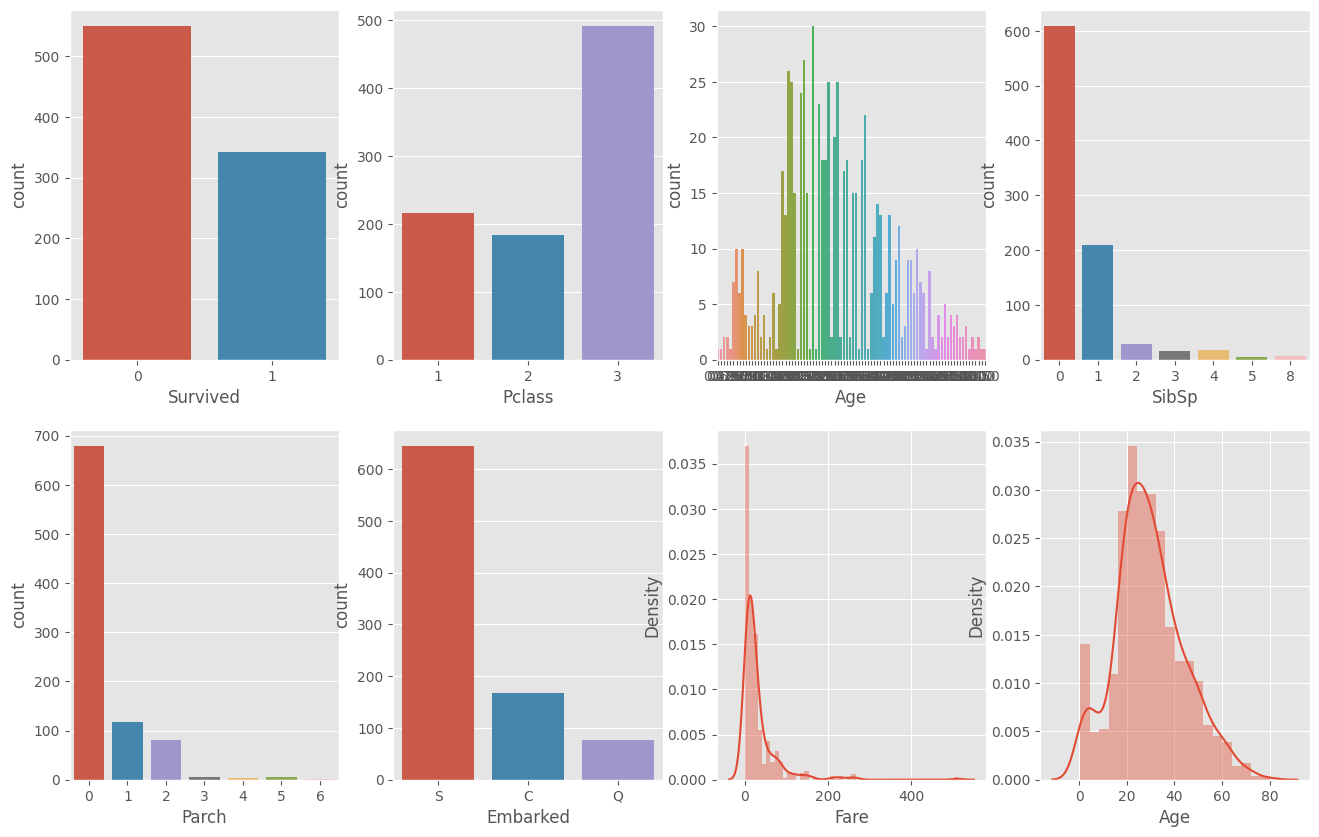

In [41]:

# fig = plt.figure()
# axes= fig.add_axes([0.1,0.1,0.8,0.8])
fig , axes = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x = 'Survived', data=train , ax = axes[0,0])
sns.countplot(x = 'Pclass',data=train,ax = axes[0,1])
sns.countplot(x = 'Age',data=train,ax = axes[0,2])
sns.countplot(x = 'SibSp',data=train,ax = axes[0,3])
sns.countplot(x = 'Parch',data=train,ax = axes[1,0])
sns.countplot(x = 'Embarked',data=train,ax = axes[1,1])
sns.distplot(train['Fare'], kde = True , ax = axes[1,2])
sns.distplot(train['Age'], kde = True , ax = axes[1,3])


Bivariate Data Analysis

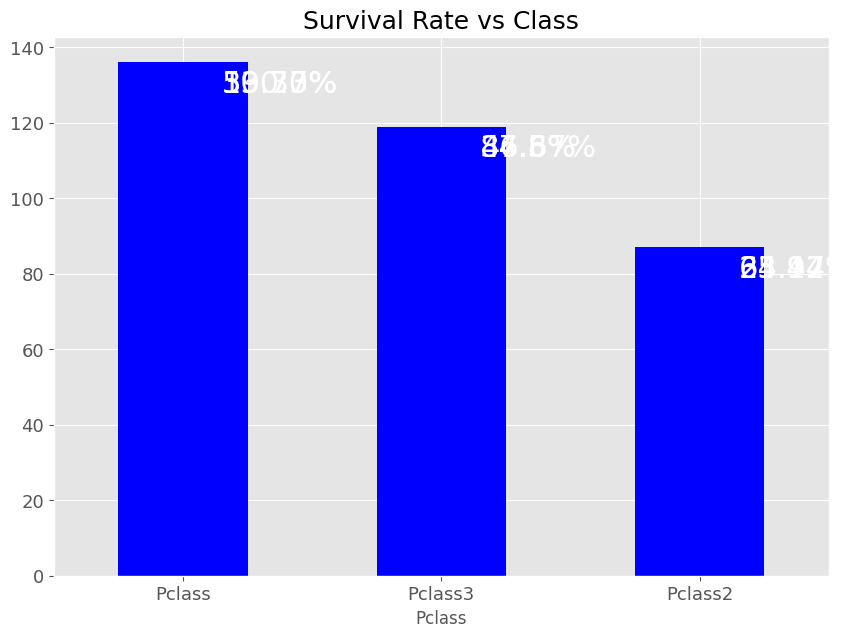

In [47]:
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue')
plt.xticks(np.arange(3), ['Pclass' , 'Pclass3' , 'Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title("Survival Rate vs Class" , fontsize=18)

totals = []

for i in ax.patches:
    totals.append(i.get_height())
    
    total=sum(totals)


    for i in ax.patches:
      ax.text(i.get_x()+0.4, i.get_height()-8, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
              color='white')